In [78]:
# pip install dicom
# !pip install pydicom
# !pip install pillow

In [36]:
import pydicom as dicom
import matplotlib.pyplot as plt

data_dir = r'D:\datasets\rsna-miccai-brain-tumor-radiogenomic-classification\train\00000\FLAIR'
img_list = os.listdir(data_dir)

img_list[0]

'Image-1.dcm'

In [75]:
img_1 = dicom.dcmread(r"D:\datasets\rsna-miccai-brain-tumor-radiogenomic-classification\train\00000\T1wCE\Image-50.dcm")

In [45]:
img_1.pixel_array.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

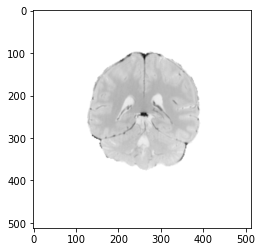

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [76]:
data = apply_voi_lut(img_1.pixel_array, img_1)
data = np.amax(data) - data
        
data = data - np.min(data)
data = data / np.max(data)
data = (data * 255).astype(np.uint8)
final_img = Image.fromarray(data)

plt.imshow(final_img, cmap = 'gray')
plt.show()
data

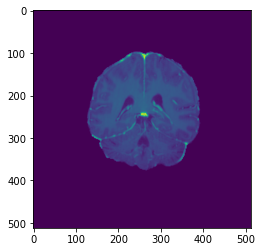

In [98]:
import numpy as np
from PIL import Image

im = img_1.pixel_array.astype(float)
re = (np.maximum(im,0) / im.max())* 255
finl = np.uint8(re)

final_img = Image.fromarray(finl)

plt.imshow(final_img)
plt.show()




<ipython-input-96-a05dfe248e75>:20: RuntimeWarning: invalid value encountered in true_divide
  data = data / np.max(data)


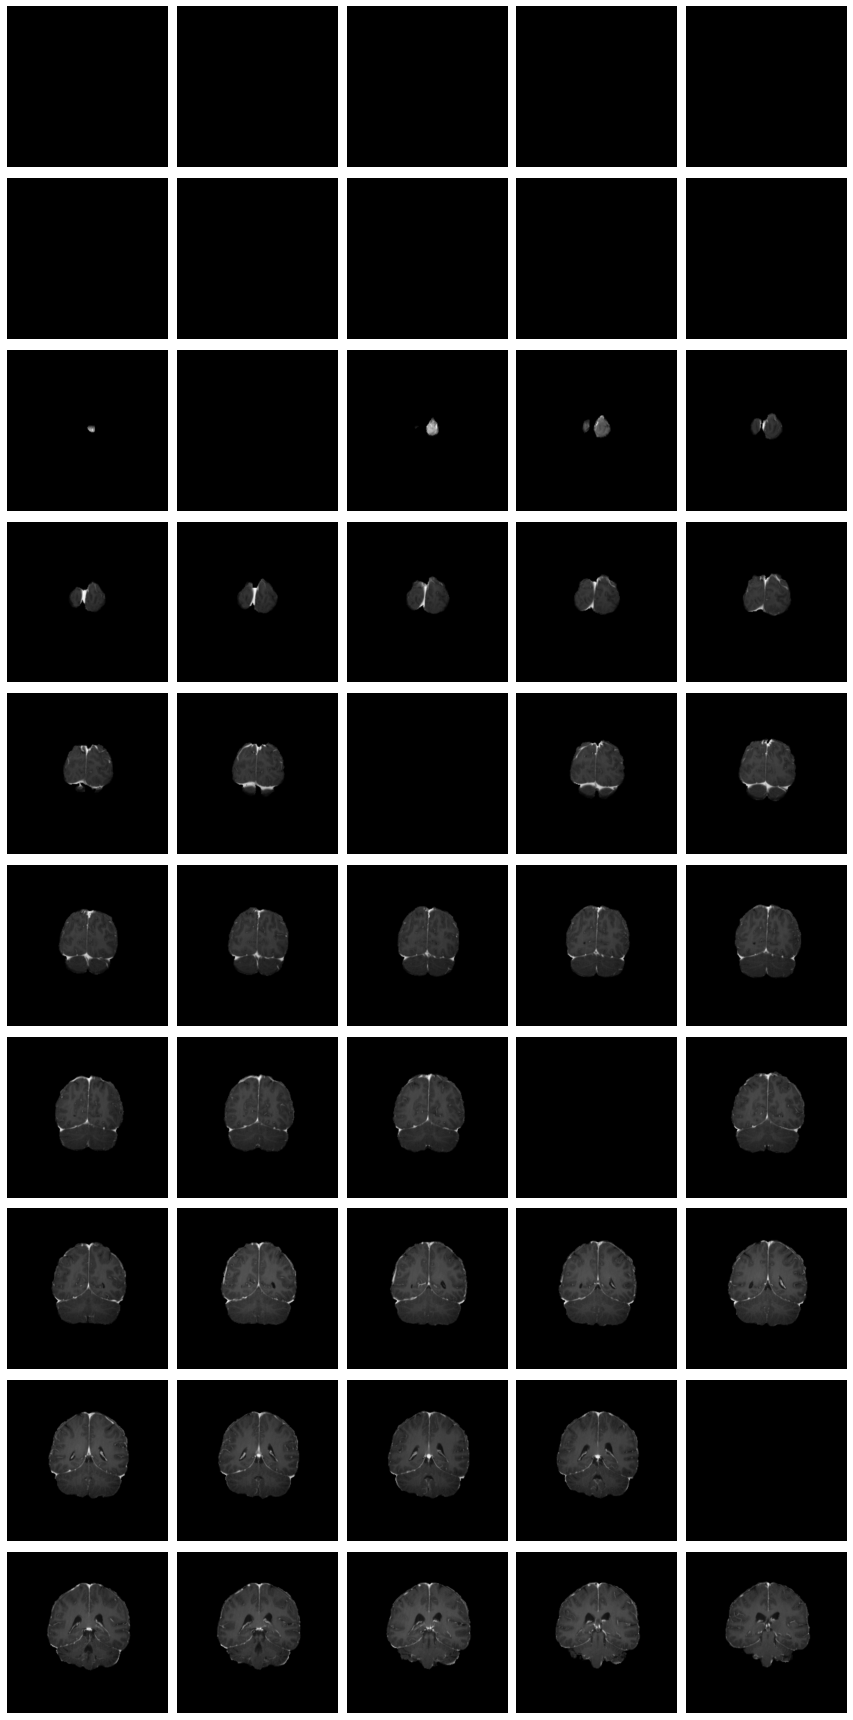

In [96]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import glob
import matplotlib.pyplot as plt
%matplotlib inline

def dicom2array(path, voi_lut=True, fix_monochrome=True):
    # Original from: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way
    dicom = pydicom.read_file(path)
    
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

image_list = sorted(glob.glob(r"D:\datasets\rsna-miccai-brain-tumor-radiogenomic-classification\train\00000\T1wCE\*.dcm"))
num_cols = 5
start = 30
end = 80
f, ax = plt.subplots(nrows= 10, ncols= 5, figsize=(12, 24))
for index in range(start, end):
    img = dicom2array(image_list[index])
    index = index-start
    i,j = index // num_cols, index % num_cols
    ax[i, j].imshow(img, cmap="gray")
    ax[i, j].axis("off")
plt.tight_layout()
plt.show()

In [17]:
dicom = pydicom.read_file(image_list[29])

In [24]:
dicom.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [59]:
a = [5,6,3,6,4,2]
np.amax(a)

6